<a href="https://colab.research.google.com/github/pavanm555/Artificial-Intelligence/blob/main/7_CNN_Model_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/CNN_Animal_Dataset.zip'

Archive:  /content/CNN_Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create data generators for training and testing data
train_gen = ImageDataGenerator(rescale=(1./255),shear_range=0.2,horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255) # --> (0 to 255) convert to (0 to 1)

In [ ]:
# Load training and testing data using the data generator
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
# CNN model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 21s 73ms/step - loss: 1.5945 - accuracy: 0.2908 - val_loss: 1.3830 - val_accuracy: 0.2914
Epoch 2/10
155/155 [==============================] - 12s 75ms/step - loss: 1.3762 - accuracy: 0.3191 - val_loss: 1.3808 - val_accuracy: 0.2914
Epoch 3/10
155/155 [==============================] - 12s 75ms/step - loss: 1.3677 - accuracy: 0.3207 - val_loss: 1.3802 - val_accuracy: 0.2914
Epoch 4/10
155/155 [==============================] - 10s 64ms/step - loss: 1.3639 - accuracy: 0.3207 - val_loss: 1.3806 - val_accuracy: 0.2914
Epoch 5/10
155/155 [==============================] - 12s 75ms/step - loss: 1.3615 - accuracy: 0.3207 - val_loss: 1.3815 - val_accuracy: 0.2914
Epoch 6/10
155/155 [==============================] - 12s 75ms/step - loss: 1.3597 - accuracy: 0.3199 - val_loss: 1.3825 - val_accuracy: 0.2914
Epoch 7/10
155/155 [==============================] - 12s 74ms/step - loss: 1.3589 - accuracy: 0.3207 - val_loss: 1.3836 - val_accuracy:

In [ ]:
model.save('animalWeights.h5')

In [ ]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
animals = list(train.class_indices.keys())
animals

['bears', 'crows', 'elephants', 'rats']

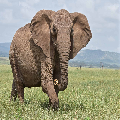

In [ ]:
# Testing 1
img1 = image.load_img('/content/elephant.jpg',target_size = (120,120))
img1

In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
animals[pred]

1/1 [==============================] - 0s 27ms/step
0


'bears'

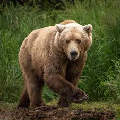

In [ ]:
# Testing 2
img2 = image.load_img('/content/bear.jpeg',target_size = (120,120))
img2

In [ ]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
animals[pred]

1/1 [==============================] - 0s 19ms/step
0


'bears'

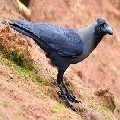

In [ ]:
# Testing 3
img3 = image.load_img('/content/crow.jpeg',target_size = (120,120))
img3

In [ ]:
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
animals[pred]

1/1 [==============================] - 0s 19ms/step
0


'bears'

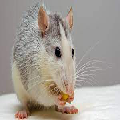

In [ ]:
# Testing 4
img4 = image.load_img('/content/rat.jpeg',target_size = (120,120))
img4

In [ ]:
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
animals[pred]

1/1 [==============================] - 0s 20ms/step
0


'bears'

## Model Tuning (Adding feature extraction layers)

In [ ]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120,120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 36)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
155/155 [==============================] - 15s 73ms/step - loss: 1.3067 - accuracy: 0.3312 - val_loss: 1.1492 - val_accuracy: 0.4540
Epoch 2/50
155/155 [==============================] - 12s 75ms/step - loss: 1.1097 - accuracy: 0.5065 - val_loss: 0.8288 - val_accuracy: 0.7025
Epoch 3/50
155/155 [==============================] - 12s 76ms/step - loss: 0.8947 - accuracy: 0.6284 - val_loss: 0.7478 - val_accuracy: 0.6748
Epoch 4/50
155/155 [==============================] - 11s 71ms/step - loss: 0.7460 - accuracy: 0.6955 - val_loss: 0.5642 - val_accuracy: 0.7730
Epoch 5/50
155/155 [==============================] - 12s 75ms/step - loss: 0.6570 - accuracy: 0.7262 - val_loss: 0.4499 - val_accuracy: 0.8221
Epoch 6/50
155/155 [==============================] - 12s 75ms/step - loss: 0.5198 - accuracy: 0.7884 - val_loss: 0.3332 - val_accuracy: 0.8896
Epoch 7/50
155/155 [==============================] - 12s 76ms/step - loss: 0.4300 - accuracy: 0.8247 - val_loss: 0.3492 - val_accuracy:

In [ ]:
# Testing 1
img1 = image.load_img('/content/elephant.jpg',target_size = (120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
animals[pred]

1/1 [==============================] - 0s 158ms/step
3


'rats'

In [ ]:
# Testing 2
img2 = image.load_img('/content/bear.jpeg',target_size = (120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
animals[pred]

1/1 [==============================] - 0s 28ms/step
0


'bears'

In [ ]:
# Testing 3
img3 = image.load_img('/content/crow.jpeg',target_size = (120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
animals[pred]

1/1 [==============================] - 0s 19ms/step
2


'elephants'

In [ ]:
# Testing 4
img4 = image.load_img('/content/rat.jpeg',target_size = (120,120))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
animals[pred]

1/1 [==============================] - 0s 19ms/step
3


'rats'

## Model tuning (with dropout, batch normalization & early stopping)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
# Initializing the seq model
model = Sequential()
# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the conv layer output
model.add(BatchNormalization())
# Selecting the max values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hiddern layers
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 12)     48        
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 12)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 24)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50,callbacks=early_stop)

Epoch 1/50
155/155 [==============================] - 16s 80ms/step - loss: 1.1602 - accuracy: 0.4943 - val_loss: 2.0151 - val_accuracy: 0.2945
Epoch 2/50
155/155 [==============================] - 11s 72ms/step - loss: 0.9396 - accuracy: 0.6131 - val_loss: 2.2085 - val_accuracy: 0.2607
Epoch 3/50
155/155 [==============================] - 13s 85ms/step - loss: 0.7950 - accuracy: 0.6890 - val_loss: 2.8655 - val_accuracy: 0.3988
Epoch 4/50
155/155 [==============================] - 12s 78ms/step - loss: 0.7250 - accuracy: 0.7044 - val_loss: 1.0086 - val_accuracy: 0.6012
Epoch 5/50
155/155 [==============================] - 12s 74ms/step - loss: 0.7110 - accuracy: 0.7141 - val_loss: 0.6694 - val_accuracy: 0.7239
Epoch 6/50
155/155 [==============================] - 12s 78ms/step - loss: 0.6148 - accuracy: 0.7633 - val_loss: 0.7899 - val_accuracy: 0.6748
Epoch 7/50
155/155 [==============================] - 12s 77ms/step - loss: 0.5270 - accuracy: 0.8086 - val_loss: 0.6786 - val_accuracy:

In [ ]:
# Testing 1
img1 = image.load_img('/content/elephant.jpg',target_size = (120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
animals[pred]

1/1 [==============================] - 0s 21ms/step
1


'crows'

In [ ]:
# Testing 2
img2 = image.load_img('/content/bear.jpeg',target_size = (120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
animals[pred]

1/1 [==============================] - 0s 22ms/step
0


'bears'

In [ ]:
# Testing 3
img3 = image.load_img('/content/crow.jpeg',target_size = (120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
animals[pred]

1/1 [==============================] - 0s 27ms/step
2


'elephants'

In [ ]:
# Testing 4
img4 = image.load_img('/content/rat.jpeg',target_size = (120,120))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
animals[pred]

1/1 [==============================] - 0s 21ms/step
1


'crows'